<a href="https://colab.research.google.com/github/ismail61/ML_Lab/blob/master/lab_final/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 01 (For ML Lab):

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '//content/drive/MyDrive/Dataset/CNN/Dataset.zip'

In [8]:
#Importing the libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
dir_path = '/content/CNN_dataset'
images = []
labels = []
SIZE = 64

In [10]:
for i, class_name in enumerate(['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']):
  images_dir = os.path.join(dir_path, class_name)
  for image_name in os.listdir(images_dir):
      img_path = os.path.join(images_dir, image_name)
      image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, (SIZE, SIZE))
      images.append(image)
      labels.append(i)

In [11]:
AbdomenCT = os.listdir(dir_path + '/AbdomenCT/')
len(AbdomenCT)

10000

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [13]:
model = Sequential(
  [
      Conv2D(filters=64, kernel_size=(2, 2),strides=(1, 1), padding='same', activation='relu', input_shape=(SIZE, SIZE, 1)) ,
      MaxPooling2D(pool_size=(2, 2)),
      BatchNormalization(axis = -1),
      Dropout(0.3),
      Conv2D(filters=32, kernel_size=(2, 2),strides=(1, 1), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      BatchNormalization(axis = -1),
      Dropout(0.3),
      Conv2D(filters=64, kernel_size=(2, 2),strides=(1, 1), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(256, activation='relu'),
      BatchNormalization(axis = -1),
      Dropout(0.3),
      Dense(5, activation='softmax')
  ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

In [18]:
x_train = x_train / 255.
x_test = x_test / 255.

In [19]:
x_train = x_train.reshape(-1, SIZE, SIZE, 1)
x_test = x_test.reshape(-1, SIZE, SIZE, 1)

In [27]:
history = model.fit(
    x_train,
    y_train, 
    batch_size = 64, 
    verbose = 1, 
    epochs = 15,
    validation_split = 0.1,
    shuffle = False
)

Epoch 1/15
506/506 [==============================] - 8s 16ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0226 - val_accuracy: 0.9939
Epoch 2/15
506/506 [==============================] - 8s 16ms/step - loss: 8.1910e-04 - accuracy: 0.9998 - val_loss: 0.0192 - val_accuracy: 0.9917
Epoch 3/15
506/506 [==============================] - 8s 16ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0317 - val_accuracy: 0.9853
Epoch 4/15
506/506 [==============================] - 8s 16ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 5/15
506/506 [==============================] - 8s 16ms/step - loss: 6.8754e-04 - accuracy: 0.9998 - val_loss: 0.1126 - val_accuracy: 0.9683
Epoch 6/15
506/506 [==============================] - 8s 15ms/step - loss: 6.0483e-04 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9986
Epoch 7/15
506/506 [==============================] - 8s 16ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.0989 - val_accu

In [28]:
print("Model_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))

235/235 [==============================] - 1s 4ms/step - loss: 0.0061 - accuracy: 0.9987
Model_Accuracy: 99.87%


In [29]:
import matplotlib.pyplot as plt

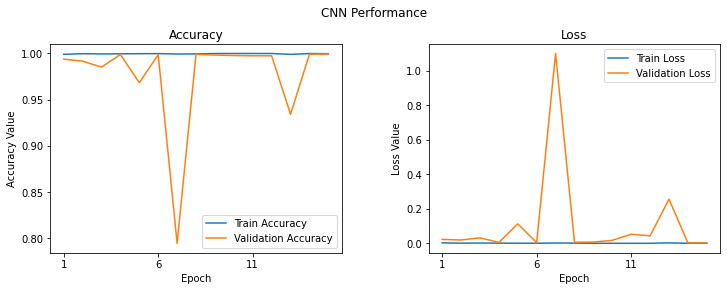

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")